In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [52]:
# Carregamento do dataframe
df = pd.read_csv('/content/Mall_Customers.csv')

# Análise Exploratória dos Dados

In [53]:
# Visualização do dataframe
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [54]:
# Contagem de valores do dataframe
df.count()

,0
CustomerID,200
Gender,200
Age,200
Annual Income (k$),200
Spending Score (1-100),200


In [55]:
# Verificando a presença de valores nulos
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [56]:
# Verificando a presença de valores não nulos
df.notnull().sum()

,0
CustomerID,200
Gender,200
Age,200
Annual Income (k$),200
Spending Score (1-100),200


In [57]:
# Descrição das features
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Pré-processamento dos dados

* Seleção de features

In [58]:
# Removendo a coluna CustomerID por irrelevância
df = df.drop(['CustomerID'], axis=1)

In [59]:
# Log para segurança
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40




*   Normalização dos dados



In [60]:
# Chamando o Standard Scaler
std = StandardScaler()

In [61]:
# Selecionando apenas as colunas númericas
numeric_columns = df.select_dtypes(include=['number']).columns

In [62]:
# Realizando o fit transform apenas nas colunas númericas do dataframe
df[numeric_columns] = std.fit_transform(df[numeric_columns])

In [63]:
# Log para segurança
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,-1.424569,-1.738999,-0.434801
1,Male,-1.281035,-1.738999,1.195704
2,Female,-1.352802,-1.700830,-1.715913
3,Female,-1.137502,-1.700830,1.040418
4,Female,-0.563369,-1.662660,-0.395980


* One Hot Enconder

In [64]:
# Declarando o One Hot Enconder
ohe = OneHotEncoder()

In [65]:
# Aplicando para a única variável categórica "Gender"
gender_encoded = ohe.fit_transform(df[['Gender']]).toarray()
gender_df = pd.DataFrame(gender_encoded, columns=ohe.get_feature_names_out(['Gender']))
df = pd.concat([df.drop('Gender', axis=1), gender_df], axis=1)

In [66]:
# Log para segurança
display(df.head(5))

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,0.0,1.0
1,-1.281035,-1.738999,1.195704,0.0,1.0
2,-1.352802,-1.700830,-1.715913,1.0,0.0
3,-1.137502,-1.700830,1.040418,1.0,0.0
4,-0.563369,-1.662660,-0.395980,1.0,0.0


# Treinamento do modelo

* Método do cotovelo

In [67]:
# Calcular a inércia
wcss = []
K_range = range(1,11) # Analisar dez valores de K

for k in K_range:
  kmeans = KMeans(n_clusters=k, random_state=42) # declarando KMeans com valores k de clusters
  kmeans.fit(df) # Realizando o fit no dataframe com aquele valor de K
  wcss.append(kmeans.inertia_) # Adicionando o valor da inércia para aquele valor de K


In [68]:
print(wcss)

[698.5599999999997, 487.65863415711783, 394.2720694203255, 303.34066704491033, 286.64524385759944, 252.1744403424114, 220.12111529324926, 187.78899002798673, 176.11390538071268, 165.4842012447733]


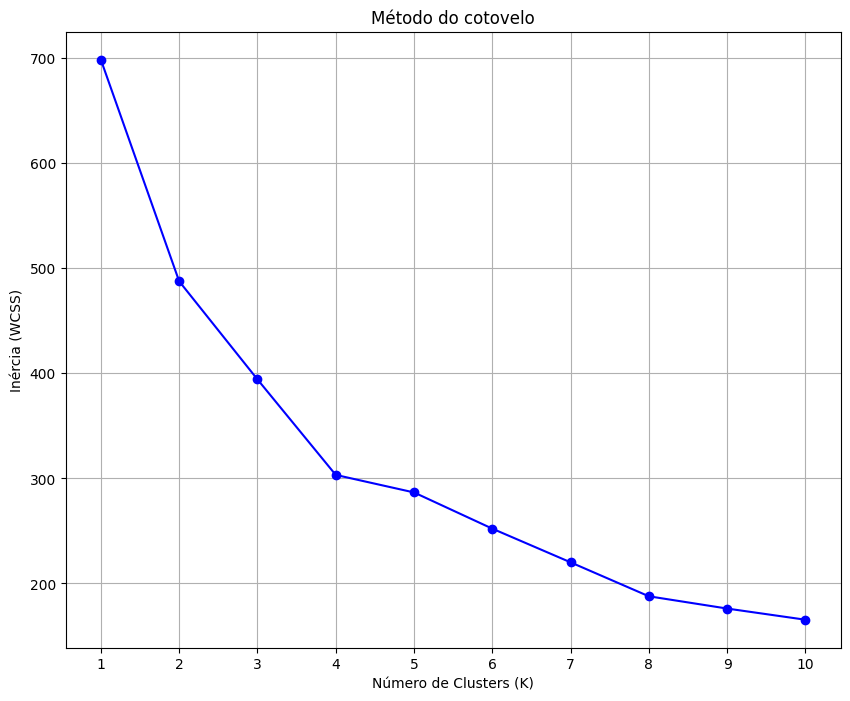

In [69]:
# Plotando o método do cotovelo
plt.figure(figsize=(10,8))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.title('Método do cotovelo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia (WCSS)')
plt.xticks(K_range)
plt.grid(True)

plt.show()

* Treinamento do modelo com o K ideal

In [70]:
model = KMeans(n_clusters=4, random_state=42)
final_model = model.fit(df)

In [71]:
predict_labels = final_model.labels_

# Visualizações

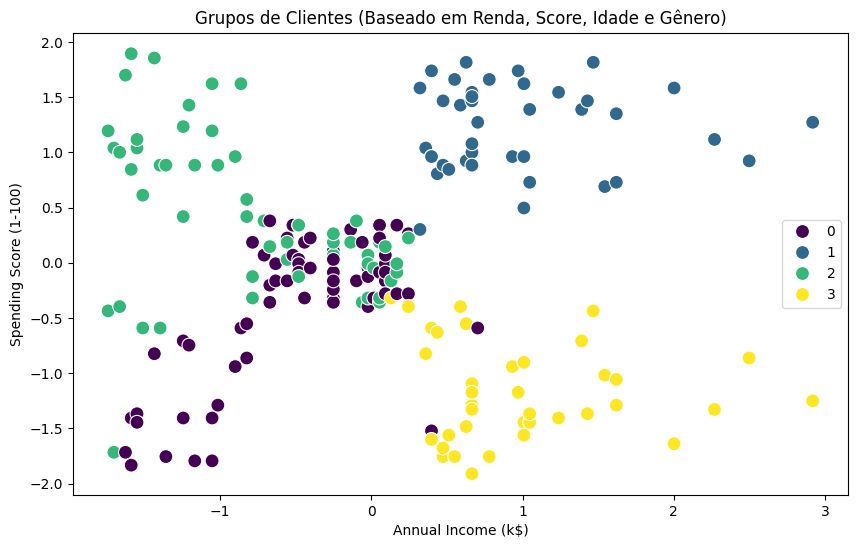

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue=predict_labels, palette='viridis', s=100)
plt.title('Grupos de Clientes (Baseado em Renda, Score, Idade e Gênero)')
plt.show()

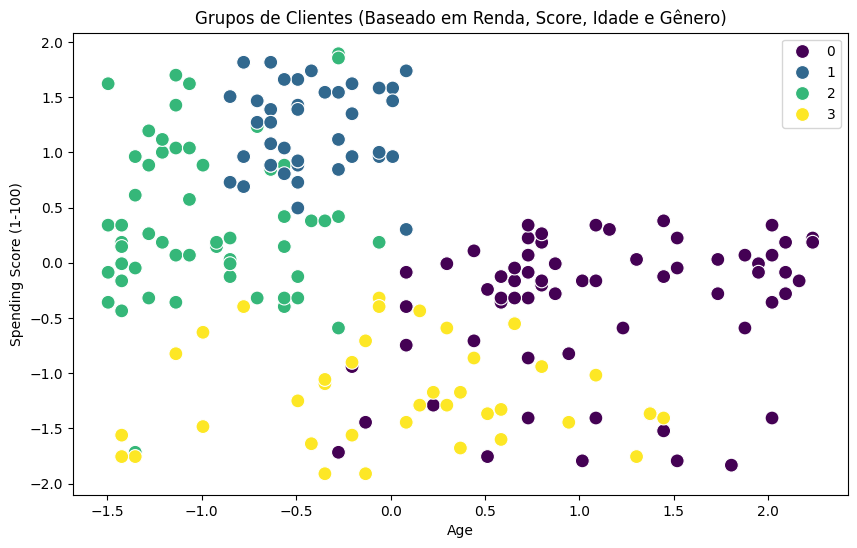

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue=predict_labels, palette='viridis', s=100)
plt.title('Grupos de Clientes (Baseado em Renda, Score, Idade e Gênero)')
plt.show()

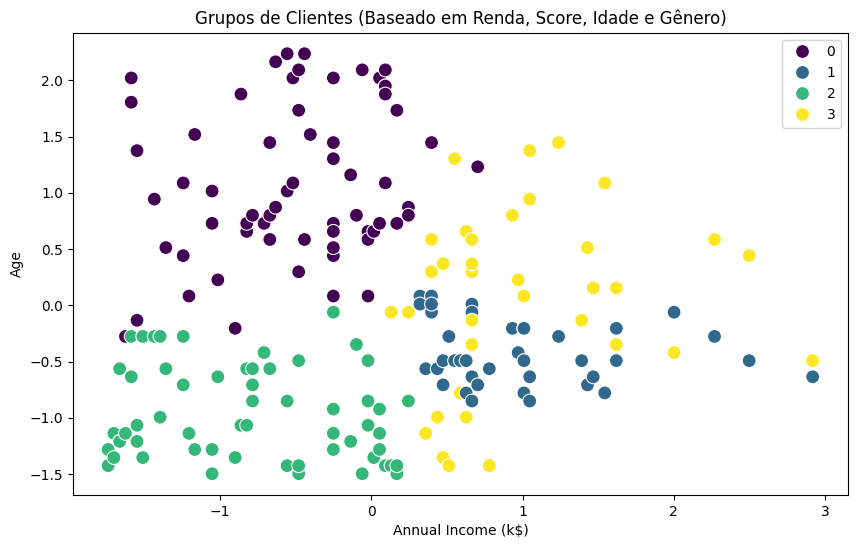

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Age', hue=predict_labels, palette='viridis', s=100)
plt.title('Grupos de Clientes (Baseado em Renda, Score, Idade e Gênero)')
plt.show()